The definition of the variables used in the Bookbinder dataset is given below. Use choice variable as dependent variable.

Choice: Whether the customer purchased the The Art History of Florence. 1 corresponds to a purchase and 0 corresponds to a nonpurchase.

Gender: 0 = Female and 1 = Male.

Amount purchased: Total money spent on BBBC books.

Frequency: Total number of purchases in the chosen period (used as a proxy for frequency.)

Last purchase (recency of purchase): Months since last purchase.

First purchase: Months since first purchase.

P_Child: Number of children’s books purchased.

P_Youth: Number of youth books purchased.

P_Cook: Number of cookbooks purchased.

P_DIY: Number of do-it-yourself books purchased.

P_Art: Number of art books purchased.


In [1]:

import pandas as pd
import numpy as np
df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df.head()

,Gender,Amount purchased,Frequency,Last purchase,First purchase,P_Child,P_Youth,P_Cook,P_DIY,P_Art,Staus,Choice
0,1,113,8,1,8,0,1,0,0,0,Training,Y
1,1,418,6,11,66,0,2,3,2,3,Training,Y
2,1,336,18,6,32,2,0,1,1,2,Training,Y
3,1,180,16,5,42,2,0,0,1,1,Training,Y
4,0,320,2,3,18,0,0,0,1,2,Training,Y


In [ ]:
# Using dataframe df: convert choice to 0(N)and 1(Y)

# Convert 'Choice' column to numerical values (0 for 'N', 1 for 'Y')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})
 #Using dataframe df: Use choice variable as dependent variable.
 #Construct training data and test data  when the status variables having  Training and  Test value.

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame
# Filter the DataFrame for training data
training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']
# Define features (X) and target variable (y)
X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_test = test_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_test = test_data['Choice']


In [3]:
#Q1(25 pt)-Using logistic regression model in train data,
#a)	In the model, test that the claim that the coefficients of independent variables are different than 0 at the 5% significance level.
#b)	Which variables that is significantly different than 0 increase or decrease the probability of Choice=Yes?
import pandas as pd
import statsmodels.api as sm

df = pd.read_excel("https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls")

df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})

training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']

features = ['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
            'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']
X_train = training_data[features]
y_train = training_data['Choice']
X_train_const = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.435050
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1589
Method:                           MLE   Df Model:                           10
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.2264
Time:                        06:42:50   Log-Likelihood:                -696.08
converged:                       True   LL-Null:                       -899.74
Covariance Type:            nonrobust   LLR p-value:                 2.612e-81
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3515      0.214     -1.640      0.101      -0.772       0.069
Gender     

1a- At the 5% significance level, all variables except First purchase have coefficients significantly different from zero. This means they have a statistically meaningful impact on the probability of purchase.

1b- Variables that increase the chance of purchasing the art history book are Amount purchased, Last purchase, and P_Art. Variables that decrease the chance are Gender (if male), Frequency, P_Child, P_Youth, P_Cook, and P_DIY. First purchase has no significant effect.

In [4]:
#Q2(15 pt)-Using knn model in train data(choose k based on CV),
#get the performance metric on test data(accuracy,recall, precision confusion matrix). What is the k value chosen based on k?

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

X_train = training_data[features]
y_train = training_data['Choice']
X_test = test_data[features]
y_test = test_data['Choice']

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print("Confusion Matrix:")
print(conf_matrix)



Best k: 14
Accuracy: 0.895
Precision: 0.089
Recall: 0.020
Confusion Matrix:
[[2055   41]
 [ 200    4]]


On the test data, the KNN model achieved:

Accuracy: 0.895

Precision: 0.089

Recall: 0.020

In [6]:
#Q3(35 pt)-Get the performance metric on test data (accuracy,recall, precision, confsuion matrix area under curve(auc)) using
#Logistic regression,naive bayes, Multi layer perceptor(MLP) and SVM, ligtGBM and kNN with optimized parameter in Q2.
#Report which methods performs best on these metrics?
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import lightgbm as lgb

df = pd.read_excel("https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls")
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})

training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']

features = ['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
            'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']

X_train = training_data[features]
y_train = training_data['Choice']
X_test = test_data[features]
y_test = test_data['Choice']

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "LightGBM": lgb.LGBMClassifier(),
    "KNN (k=14)": KNeighborsClassifier(n_neighbors=14)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "AUC": round(auc, 3),
        "Confusion Matrix": cm
    }

results_df = pd.DataFrame(results).T
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
                    Accuracy Precision Recall    AUC          Confusion Matrix
Logistic Regression     0.89     0.377  0.377    0.8  [[1969, 127], [127, 77]]
Naive Bayes            0.848     0.232  0.309  0.744  [[1888, 208], [141, 63]]
MLP                    0.901      0.42  0.309  0.797   [[2009, 87], [141, 63]]
SVM                    0.911       0.0    0.0  0.76

Among six models tested, Logistic Regression performed best overall with an AUC of 0.800, recall of 0.377, and precision of 0.377. While SVM had the highest accuracy (0.911), it failed to predict any positive cases (0 precision and recall). MLP had the highest precision (0.420) but lower recall. Therefore, Logistic Regression offers the best balance of performance metrics.

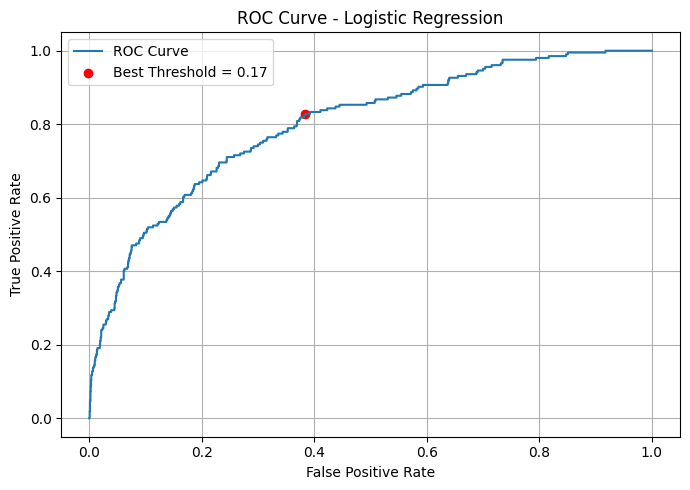

Best threshold for max profit: 0.174
Expected profit: $1056.90
Number of customers targeted: 974


In [8]:
#Q4(25 pt)-There is a need to evaluate the effectiveness of the current direct mail program and assess whether predictive modeling
#can be leveraged to enhance targeting and increase response rates.
# Assume that you make profit of 10 $ by selling a book and the cost of sending mail is 0.65 $.
# Based on the logistic model, which customers should Bookbinders target on test data?
#What is the expected profits if these customers are targeted?
#Hint :
#To evaluate the direct mail program, use an ROC curve to assess the logistic model’s ability to predict buyers.
#The curve plots True Positive Rate vs. False Positive Rate, and a high AUC shows the model is effective.
# To decide who to target, calculate profit for different probability thresholds:
# Profit = (True Positives × $9.35) - (False Positives × $0.65).
#True positive profit is $93.5 becuase revenue is $10 and there is a $0.65 cost of sending mail.
#Bookbinders should target customers with probabilities above the threshold that maximizes profit,
# improving targeting and response rates compared to the current program
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

df = pd.read_excel("https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls")
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})

training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']

features = ['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
            'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']

X_train = training_data[features]
y_train = training_data['Choice']
X_test = test_data[features]
y_test = test_data['Choice']

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_proba = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

profit_per_tp = 9.35
cost_per_fp = 0.65
profits = (tpr * sum(y_test) * profit_per_tp) - (fpr * (len(y_test) - sum(y_test)) * cost_per_fp)

best_index = np.argmax(profits)
best_threshold = thresholds[best_index]
best_profit = profits[best_index]

n_targeted = sum(y_proba >= best_threshold)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best threshold for max profit: {best_threshold:.3f}")
print(f"Expected profit: ${best_profit:.2f}")
print(f"Number of customers targeted: {n_targeted}")



Using the logistic regression model and ROC analysis, the optimal probability threshold for targeting customers was found to be 0.174. Targeting customers above this threshold would result in an expected profit of $1056.90, with 974 customers selected. This approach significantly improves the efficiency and profitability of the direct mail program compared to mailing everyone.